In [1]:
# pla function takes a data set input: x output: y and weights w and produces some line (w)
def pla(w, x, y, step_size, passes):
    
    
    for c in range(passes):
        updated = False
        
        for i in range(len(x)):
            y_prediction = w[0]*1 + w[1]*x[i][0] + w[2]*x[i][1]
            #prediction[i] = y_prediction

            if y_prediction * y[i] < 0:
                updated = True
                for j in range(len(w)):
                    if j > 0:
                        w[j] = w[j] + step_size * y[i] * x[i][j-1]
                    else:
                        w[j] = w[j] + step_size * y[i] * 1
        
        if not updated:
            print('pla finds solution')
            break
        if c == passes - 1:
            print('pla finds no solution')
    
                    

In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt
import random
import time
import numpy as np
import pandas as pd
import math



random.seed(time.time())

def data_generation(dataset_2D, size, separable):

    below_line = False
    for i in range(size):
        dataset_2D[i][0] = random.randint(1,100)
        dataset_2D[i][1] = random.randint(1,100)

    #     print(dataset_2D[i][0] * dataset_2D[i][1], " compared to ", (dataset_2D[i][0] ** 2) + 1)

        while not below_line and math.sqrt(dataset_2D[i][0] * dataset_2D[i][1]) < (math.sqrt((dataset_2D[i][0] ** 2)) + 5) :
            if (random.randint(0,9) % 10 or separable):
    #             print("adjust a top point at index:", i)
                dataset_2D[i][0] = random.randint(1,100)
                dataset_2D[i][1] = random.randint(1,100)
            else:
                print("-----skipping adjustment------")
                break


        while below_line and math.sqrt(dataset_2D[i][0] * dataset_2D[i][1]) > (math.sqrt((dataset_2D[i][0] ** 2)) - 5) :
            if (random.randint(0,9) % 10 or separable):
    #             print("adjust a bottom point at index:", i)
                dataset_2D[i][0] = random.randint(1,100)
                dataset_2D[i][1] = random.randint(1,100)
            else:
                print("-----skipping adjustment------")
                break

        if below_line :
            dataset_2D[i][2] = -1
        else:
            dataset_2D[i][2] = 1

        if i >= (size / 2) - 1:
            below_line = True

            
            
            
            




In [3]:
training_set = np.zeros((50,3))
test_set = np.zeros((30,3))
        
# print(points)

data_generation(training_set, 50, True)
data_generation(test_set, 30, False)


-----skipping adjustment------
-----skipping adjustment------
-----skipping adjustment------
-----skipping adjustment------
-----skipping adjustment------
-----skipping adjustment------


pla finds solution
[1.0, -117.0, 112.0]


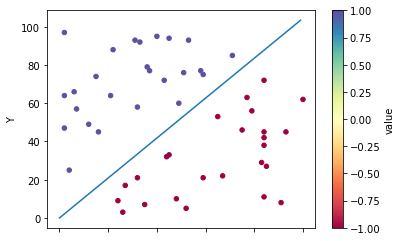

In [4]:


w = [1.0, 1.0, 1.0]


pla(w, training_set[:,0:2], training_set[:,2], 1, 1000)



m_cmap = cm.get_cmap('Spectral')

df = pd.DataFrame(training_set, columns=("X", "Y", "value"))
df.plot.scatter(x="X", y="Y", c="value", cmap=m_cmap)

x = np.array(range(100))
print(w)

y = (w[1] / -w[2]) * x + (w[0] / -w[2])

plt.plot(x, y)
plt.show()


[1.0, -117.0, 112.0]


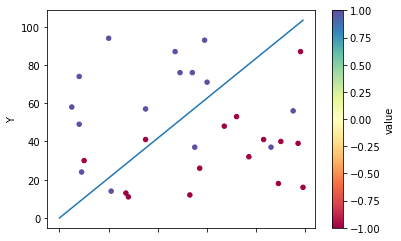

In [5]:
prediction = np.zeros(30)
for i in range(len(test_set[:,2])):
    y_prediction = w[0]*1 + w[1]*test_set[i][0] + w[2]*test_set[i][1]
    if y_prediction < 0:
        prediction[i] = -1
    else:
        prediction[i] = 1


m_cmap = cm.get_cmap('Spectral')

df = pd.DataFrame(test_set, columns=("X", "Y", "value"))
df.plot.scatter(x="X", y="Y", c="value", cmap=m_cmap)

x = np.array(range(100))
print(w)

y = (w[1] / -w[2]) * x + (w[0] / -w[2])

plt.plot(x, y)
plt.show()

In [6]:
for i in range(len(prediction)):
    if prediction[i] < 0:
        prediction[i] = -1
    else:
        prediction[i] = 1

In [7]:
 print(w)

[1.0, -117.0, 112.0]


In [8]:
success = 0;
for i in range(len(test_set[:,2])):
    if test_set[i][2] == prediction[i]:
        success += 1
    
print(success)
print('accuracy is:', float(success) / float(30))

24
accuracy is: 0.8
